# Python Decision Tree Notebook

This notebook follows documentation from http://scikit-learn.org/stable/modules/tree.html


In [1]:
import pandas as pd

## Source the data

In [2]:
hrdata = pd.read_csv("HR_clean.csv")

## Explore the data

In [3]:
hrdata.head()

,department,region,termination_date,bracket_salary 1,salary,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,resigned
0,technical,US,2015-06-27T00:00:00Z,low,52000,0.82,0.63,4,232,4,0,0,0
1,product_mng,Europe,2017-02-24T00:00:00Z,low,36000,0.72,0.79,4,154,3,0,0,0
2,sales,Canada,2008-12-06T00:00:00Z,medium,77000,0.71,0.88,3,140,2,0,0,0
3,support,US,2015-11-22T00:00:00Z,medium,70000,0.53,0.75,4,239,2,1,0,0
4,technical,US,2009-03-29T00:00:00Z,medium,76000,0.49,0.49,2,245,3,0,0,0


In [4]:
hrdata.describe()

,salary,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,resigned
count,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000
mean,67040.765391,0.615112,0.717768,3.818428,201.244904,3.500832,0.144655,0.022775,0.234401
std,29070.094821,0.249484,0.170914,1.229680,49.951292,1.470882,0.351771,0.149192,0.423646
min,30000.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,47000.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,64000.000000,0.650000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,79000.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,299000.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


https://matplotlib.org/tutorials/introductory/sample_plots.html

<IPython.core.display.Javascript object>


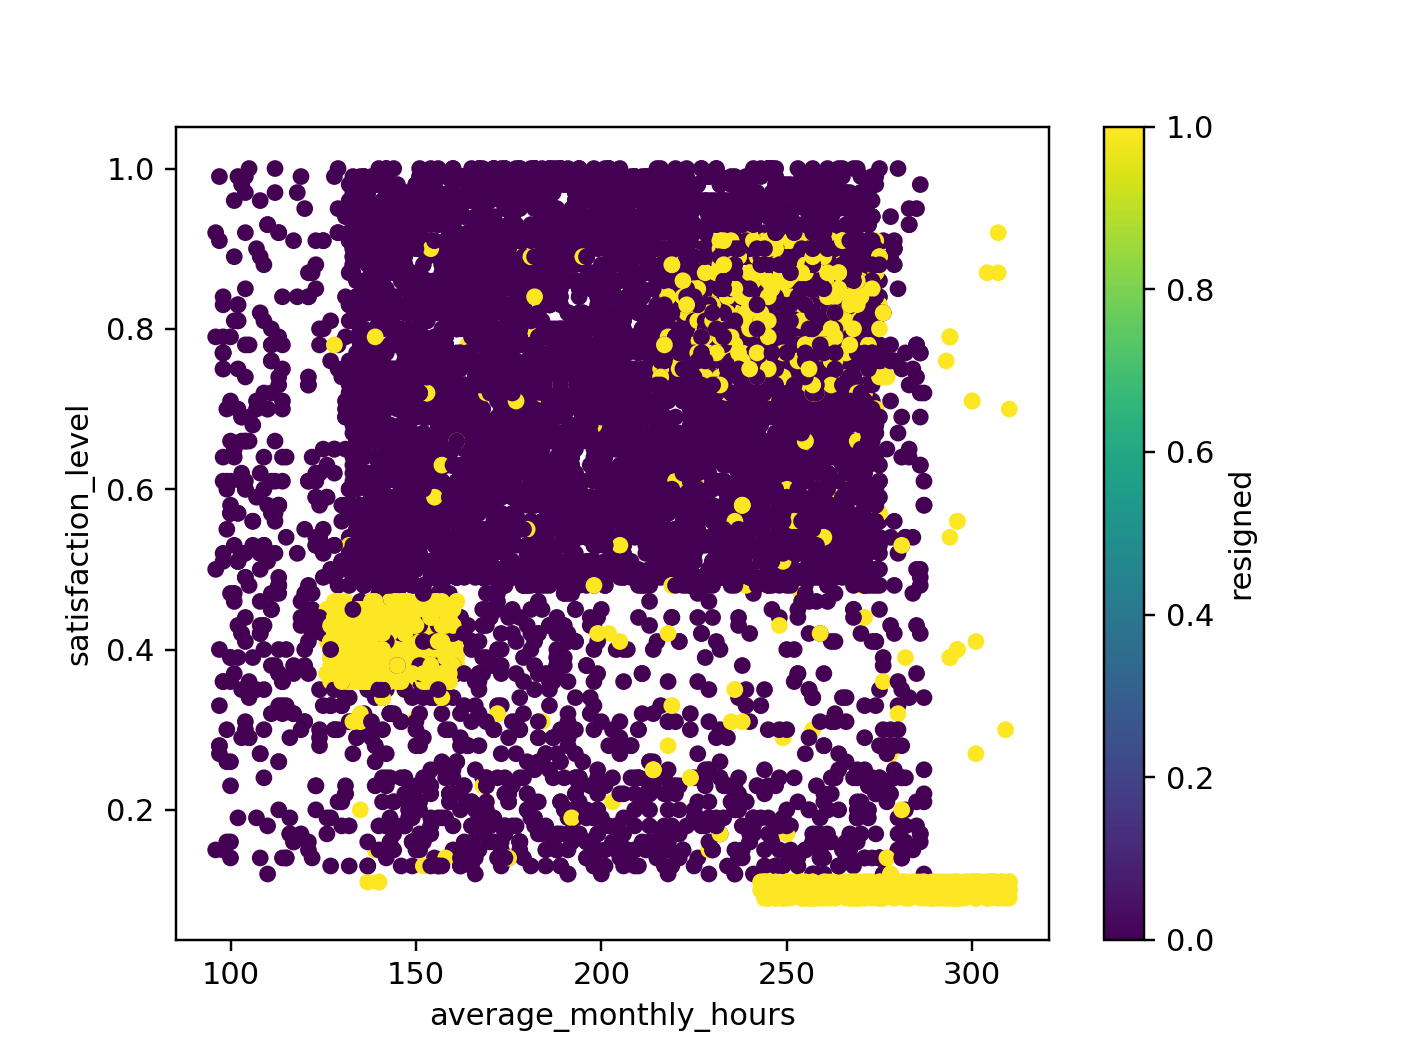

In [5]:
%matplotlib notebook
plot1 = hrdata.plot.scatter(x = 'average_monthly_hours', y = 'satisfaction_level', c = 'resigned', colormap = 'viridis')

## Building a model

http://scikit-learn.org/stable/modules/tree.html

In [8]:
classes = hrdata["resigned"]
features = hrdata.iloc[:,4:-1]

In [46]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 5)
model = model.fit(features, classes)

## Evaluating the model

In [47]:
import graphviz 

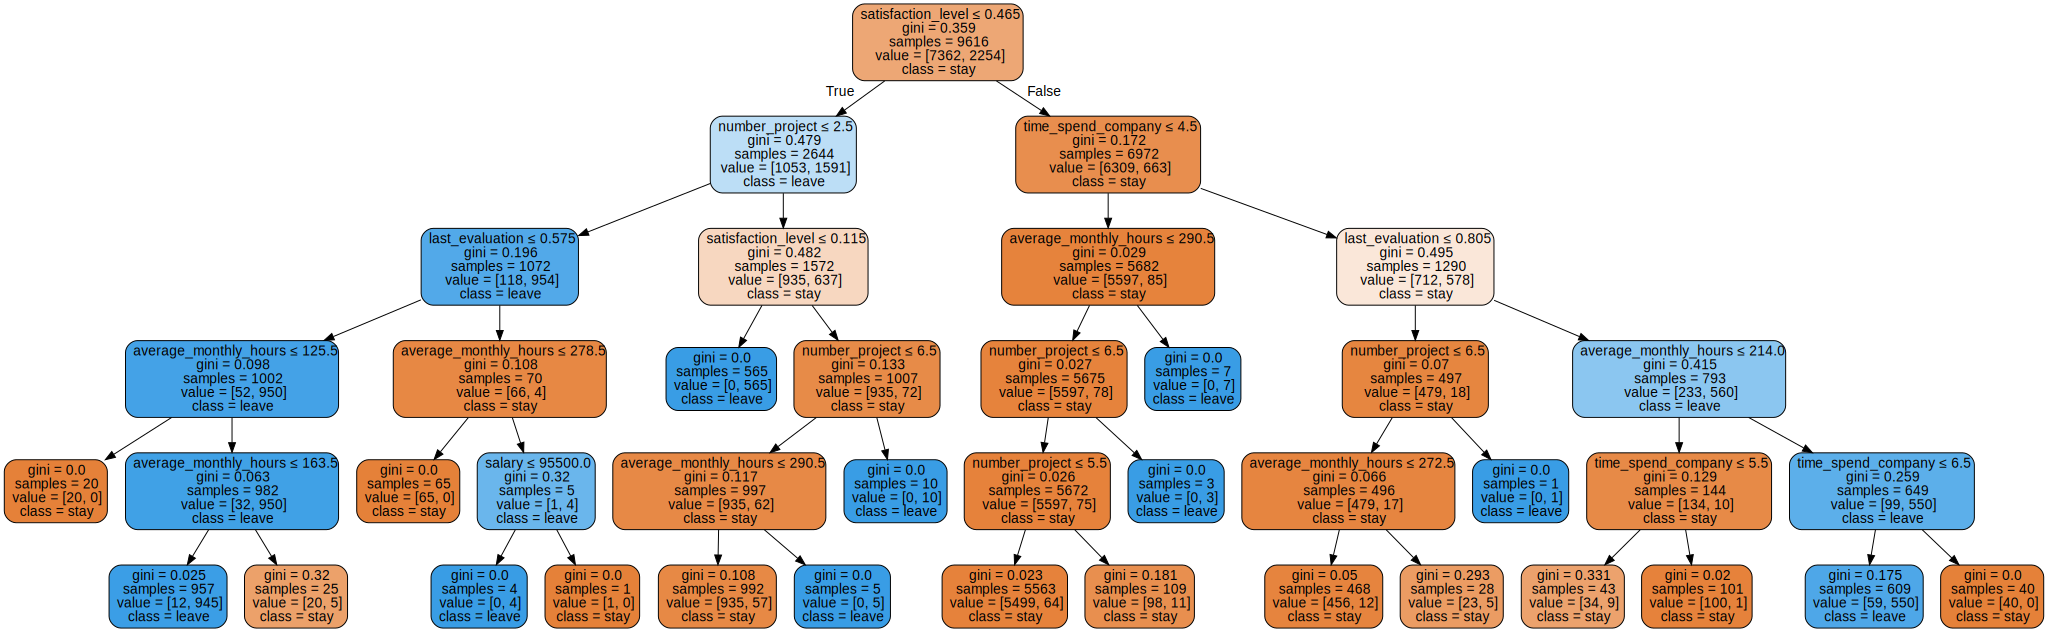

In [48]:
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names = features.columns,  
                         class_names = ["stay","leave"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [49]:
model.score(features,classes)

0.9755615640599001

In [50]:
# http://scikit-learn.org/stable/modules/cross_validation.html

from sklearn.model_selection import cross_val_score
train_test = cross_val_score(model, features, classes)
print(train_test)

[0.9753587  0.97347894 0.97223089]


In [51]:
train_test.mean()

0.9736895102753579

In [52]:
from sklearn.model_selection import cross_val_score

train_test = cross_val_score(model, features, classes)
print('Score for 3 splits of the data (1/3 test)',train_test)
print('Average score', train_test.mean())

Score for 3 splits of the data (1/3 test) [0.9753587  0.97347894 0.97223089]
Average score 0.9736895102753579


In [53]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(2,20)}

modelSearch = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)

modelSearch.fit(features, classes)

tree_model = modelSearch.best_estimator_

print(modelSearch.best_score_, modelSearch.best_params_) 

model = tree.DecisionTreeClassifier(max_depth=modelSearch.best_params_["max_depth"])
model.fit(features,classes)
#plotTree()

0.9772254575707154 {'max_depth': 7}


NameError: name 'plotTree' is not defined

## Final step

In [39]:
from IPython import display
display.HTML('<img src="{}">'.format('https://media.giphy.com/media/g9582DNuQppxC/giphy.gif'))